In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv
/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv


In [2]:
df = pd.concat((pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv',nrows = 1000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,),
                pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv',nrows = 1000000,
                                                                                                           header = 'infer',
                                                                                                           parse_dates = ['event_time'],
                                                                                                           date_parser = pd.to_datetime,)))

In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


# **RQ-2**
What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.

* Plot the most visited subcategories.
* What are the 10 most sold products per category?

In [4]:
#New columns need to be created to have subcategory and general category and product column
df['category'] = df.apply( lambda x : x['category_code'].split('.')[0] if pd.notna(x['category_code']) else x['category_code'], axis = 1)
df['sub_category'] = df.apply( lambda x : x['category_code'].split('.',2)[1] if pd.notna(x['category_code']) else x['category'], axis = 1)
df['product'] = df.apply( lambda x : x['category_code'].split('.')[-1] if pd.notna(x['category_code']) else x['category_code'], axis = 1)


In [5]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category,sub_category,product
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,electronics,smartphone,smartphone
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,appliances,sewing_machine,sewing_machine
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,NaN,NaN,NaN
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,appliances,kitchen,washer
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,electronics,smartphone,smartphone


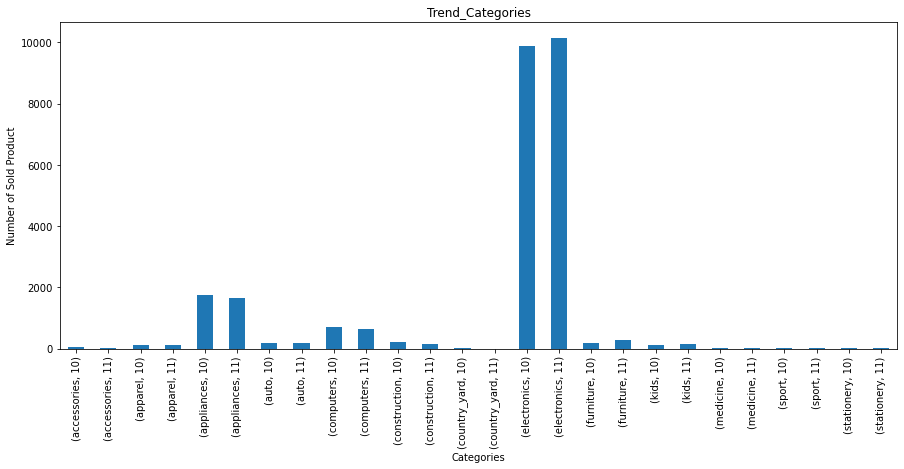

In [6]:
#What are the categories of the most trending products overall? 
#For each month visualize this information through a plot showing the number of sold products per category.

df['event_time'] = pd.to_datetime(df['event_time'])
df['event_time'] = df['event_time'].dt.month
df[df.event_type == 'purchase'].groupby(['category','event_time']).event_type.count().plot.bar(figsize = (15,6),
                                                                                            title = 'Trend_Categories',
                                                                                            ylabel = 'Number of Sold Product',
                                                                                            xlabel = 'Categories')

**It is shown in above plot that the most terending categories are electronics and appliances**

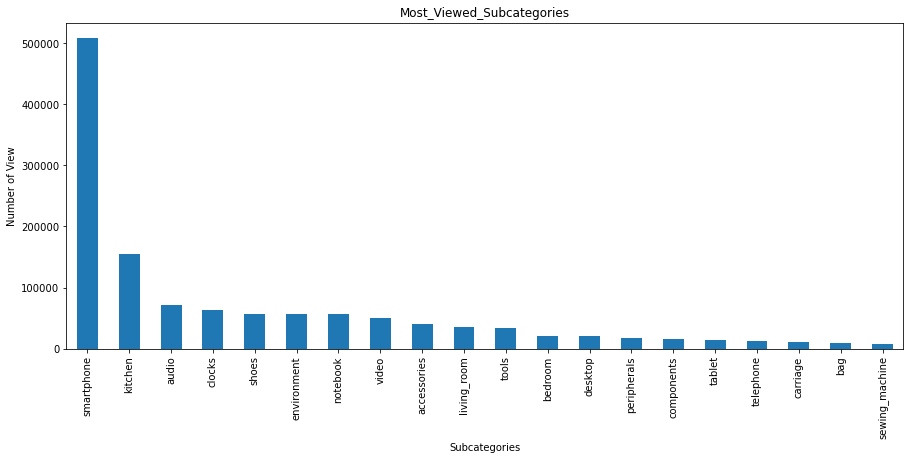

In [7]:
#Plot the most visited subcategories.

df[df.event_type == 'view'].groupby("sub_category").event_type.count().sort_values(ascending=False).nlargest(20).plot.bar(figsize = (15,6),
                                                                                            title = 'Most_Viewed_Subcategories',
                                                                                            ylabel = 'Number of View',
                                                                                            xlabel = 'Subcategories')

**We have plotted the most visited subcategories by checking the number views and it is shown above by descending order for the most viewed 20 subcategories**

In [8]:
#What are the 10 most sold products per category?

df = df[~df.index.duplicated()]
df_msp= df[(df.event_type == 'purchase')].groupby([df['category'], df['sub_category'], df['product']]).agg(count = ('product', 'count')).sort_values('count')
df_msp.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('count', ascending=False).head(10))

count
category    sub_category product         
accessories bag          bag           24
            wallet       wallet        10
apparel     shoes        shoes         59
                         keds          36
            costume      costume       11
...                                   ...
kids        dolls        dolls          5
medicine    tools        tonometer      6
sport       bicycle      bicycle        7
            trainer      trainer        6
stationery  cartrige     cartrige       2

[75 rows x 1 columns]

**The 10 most sold product per each category is shown above. For some categories there is not 10 different product but we print the 10 most sold ones by the code.**